In [45]:
import pandas as pd
SF_url='https://raw.githubusercontent.com/uwescience/datasci_course_materials/master/assignment6/sanfrancisco_incidents_summer_2014.csv'
SF_data=pd.read_csv(SF_url)

In [4]:
SF_data.head(3)

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,140734311,ARSON,ARSON OF A VEHICLE,Sunday,08/31/2014,23:50,BAYVIEW,NONE,LOOMIS ST / INDUSTRIAL ST,-122.405647,37.738322,"(37.7383221869053, -122.405646994567)",14073431126031
1,140736317,NON-CRIMINAL,LOST PROPERTY,Sunday,08/31/2014,23:45,MISSION,NONE,400 Block of CASTRO ST,-122.435012,37.761768,"(37.7617677182954, -122.435012093789)",14073631771000
2,146177923,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014,23:30,SOUTHERN,NONE,1000 Block of MISSION ST,-122.409795,37.780036,"(37.7800356268394, -122.409795194505)",14617792306244


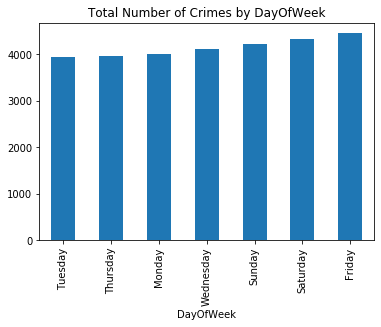

In [46]:
crime_by_day=SF_data.groupby(['DayOfWeek'])['Category'].count()
crime_by_day.sort_values().plot(kind='bar',title='Total Number of Incidents by DayOfWeek')

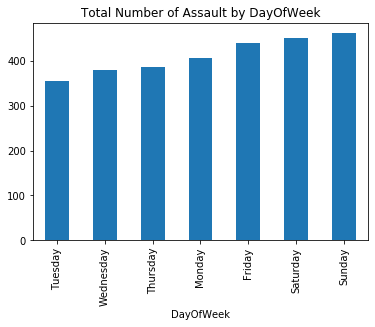

In [29]:
Assault_by_day=SF_data[SF_data['Category']=='ASSAULT'].groupby(['DayOfWeek'])['Category'].count()
Assault_by_day.sort_values().plot(kind='bar',title='Total Number of Assault by DayOfWeek')

In [72]:
ts=[ts1.hour for ts1 in pd.to_datetime(SF_data['Time'])]
SF_data['HourOfDay']=ts

C:\Users\GIASN\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


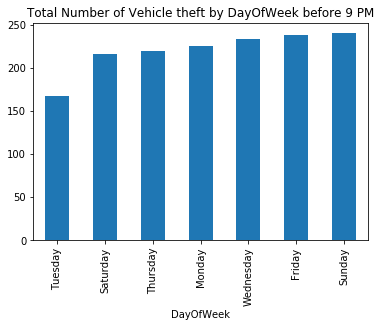

In [78]:
vehicle_theft_before_9PM=SF_data[SF_data['Category']=='VEHICLE THEFT'][SF_data['HourOfDay']<21].groupby(['DayOfWeek'])['Category'].count()
vehicle_theft_before_9PM.sort_values().plot(kind='bar',title='Total Number of Vehicle theft by DayOfWeek before 9 PM')

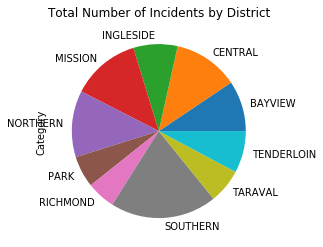

In [94]:
category_by_district=SF_data.groupby(['PdDistrict'])['Category'].count()
category_by_district.plot(kind='pie',title='Total Number of Incidents by District')

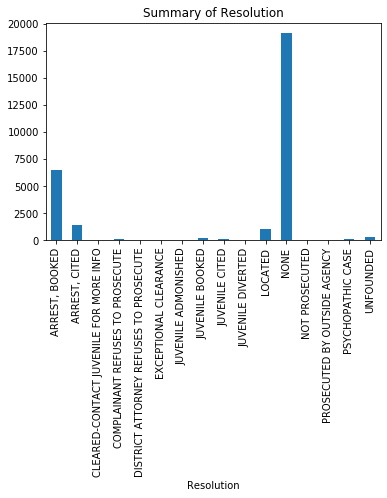

In [93]:
resolution_by_category=SF_data.groupby(['Resolution'])['Category'].count()
resolution_by_category.plot(kind='bar',title='Summary of Resolution')

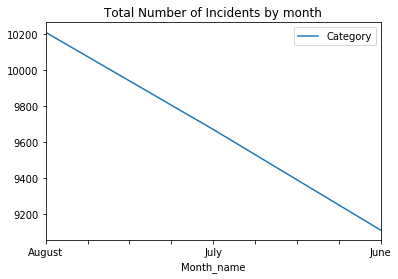

In [120]:
mnth=[m1.month_name() for m1 in pd.to_datetime(SF_data['Date'])]
SF_data['Month']=mnth
incidents_by_month=SF_data.groupby(['Month']).count()
incidents_by_month['Month_name']=incidents_by_month.index
incidents_by_month.plot(kind='line',x='Month_name',y='Category',title='Total Number of Incidents by month')